## What is the "name" of the dataset?
Crime Incident Reports (August 2015 - To Date) (Source - New System)
## Where did you obtain it?
https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system
## Where can we obtain it? (i.e., URL)
https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system
## What is the license of the dataset? What are we allowed to do with it?
Open Data Commons Public Domain Dedication and License (PDDL), this licence is intended for use on databases or their contents, either together or individually.
## How big is it in file size and in items?
The file size is 84.7MB and it has 273130 items with 17 columns.
## Explore the dataset in a Jupyter notebook. Make sure you include things that did and did not work.
The dataset is not messy and bad formatted. There is not much data cleaning work. This dataset has a lot of columns and there are many relationships between variables to explore. The types of visualzation can be abundant, too. The map can be used to mark locations of crimes. However, it includes a large number of Nan values, only 1084 data are complete. Also, the column 'reporting_area' is represented by numbers other than strings. It is hard for people to find out the exact area in Boston. 
## Summarize the characteristics of the dataset in words: what does it represent, what are the fields/columns/rows, what data types are they, etc 
The dataset represents different kind of crimes from 2015 to present. Each row in this dataframe represents an incident. And there are 17 columns including 'INCIDENT_NUMBER'(numeric), 'OFFENSE_CODE'(numeric), 'OFFENSE_CODE_GROUP'(categorical), 'OFFENSE_DESCRIPTION'(categorical), 'DISTRICT'(numeric), 'REPORTING_AREA'(numeric), 'SHOOTING'(categorical),'OCCURRED_ON_DATE'(datetime), 'YEAR'(numeric), 'MONTH'(numeric), 'DAY_OF_WEEK'(categorical), 'HOUR'(numeric), 'UCR_PART'(categorical), 'STREET'(categorical), 'Latitude'(numeric), 'Longitude'(numeric) and 'Location'(numeric). 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as systime
import datetime as dt
import string
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline


In [3]:
data = pd.read_csv('bostoncrime.csv')

In [21]:
data.columns.values

array(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR',
       'UCR_PART', 'STREET', 'Lat', 'Long', 'Location'], dtype=object)

In [6]:
data.shape

(273130, 17)

In [11]:
data = data.dropna()

In [12]:
data.shape

(1084, 17)

In [13]:
data.isna().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [14]:
data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
894,I192077645,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,295,Y,2019-09-26 02:38:00,2019,9,Thursday,2.0,Part One,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)"
895,I192077645,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,295,Y,2019-09-26 02:38:00,2019,9,Thursday,2.0,Part Two,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)"
907,I192077627,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,344,Y,2019-09-25 23:42:00,2019,9,Wednesday,23.0,Part One,WESTVILLE TER,42.300980,-71.068699,"(42.30098009, -71.06869928)"
2798,I192075578,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,457,Y,2019-09-19 17:16:00,2019,9,Thursday,17.0,Part One,FOWLER ST,42.300068,-71.083369,"(42.30006755, -71.08336910)"
3421,I192074923,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,326,Y,2019-09-17 22:35:00,2019,9,Tuesday,22.0,Part One,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"
3422,I192074923,1402,Vandalism,VANDALISM,B2,326,Y,2019-09-17 22:35:00,2019,9,Tuesday,22.0,Part Two,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"
3702,I192074613,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",C11,370,Y,2019-09-16 23:46:00,2019,9,Monday,23.0,Part One,WILLIAM T MORRISSEY BLVD,42.295072,-71.047497,"(42.29507166, -71.04749709)"
3703,I192074613,3125,Warrant Arrests,WARRANT ARREST,C11,370,Y,2019-09-16 23:46:00,2019,9,Monday,23.0,Part Three,WILLIAM T MORRISSEY BLVD,42.295072,-71.047497,"(42.29507166, -71.04749709)"
4195,I192074077,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,240,Y,2019-09-15 02:19:00,2019,9,Sunday,2.0,Part One,COLUMBIA RD,42.319593,-71.062607,"(42.31959298, -71.06260700)"
5190,I192072998,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E5,721,Y,2019-09-11 20:33:00,2019,9,Wednesday,20.0,Part One,CONSTANCE RD,42.276311,-71.165579,"(42.27631087, -71.16557934)"


In [15]:
cate_group = data.groupby(by='OFFENSE_CODE_GROUP').size()
cate_group

OFFENSE_CODE_GROUP
Aggravated Assault                 493
Auto Theft                           1
Ballistics                          59
Disorderly Conduct                   1
Drug Violation                      27
Firearm Discovery                    3
Firearm Violations                  95
Homicide                           137
Investigate Person                  11
Investigate Property                17
Manslaughter                         1
Medical Assistance                  23
Motor Vehicle Accident Response      9
Other                               20
Police Service Incidents             2
Property Found                       2
Property Lost                        1
Property Related Damage              1
Recovered Stolen Property            2
Robbery                             18
Search Warrants                     37
Simple Assault                       2
Towed                               11
Vandalism                           19
Violations                           1
Warran

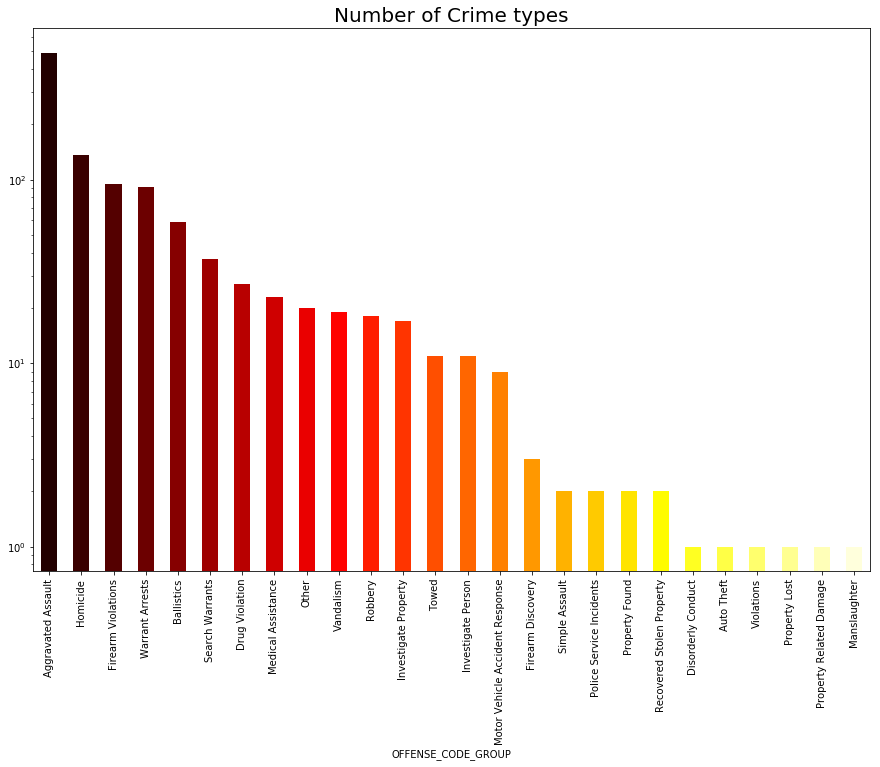

In [20]:
cat_num = len(cate_group.index)

cate_group.index = cate_group.index.map(string.capwords)
cate_group.sort_values(ascending=False,inplace=True)

cate_group.plot(kind='bar',logy=True,figsize=(15,10),color=sns.color_palette('hot',cat_num))
plt.title('Number of Crime types',fontsize=20)
plt.show()

In [24]:
data.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                   float64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object